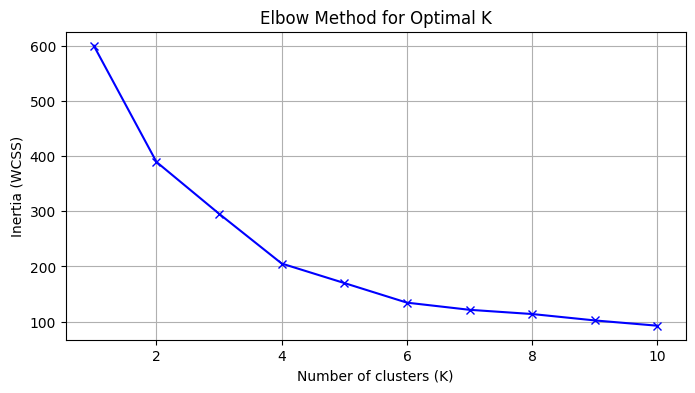

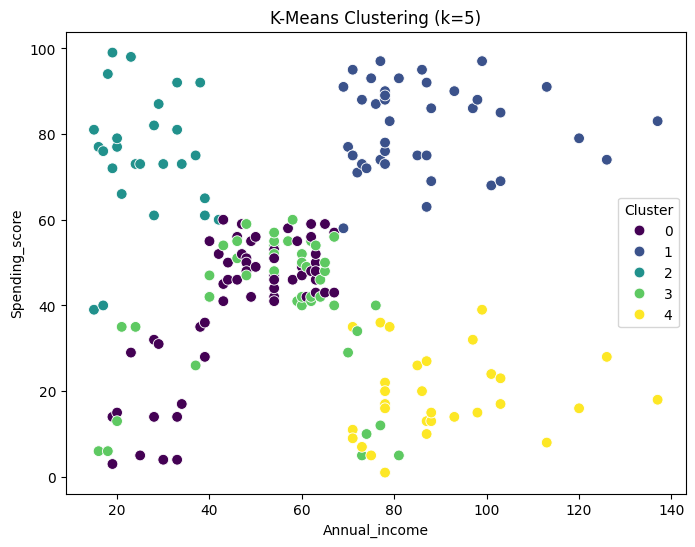

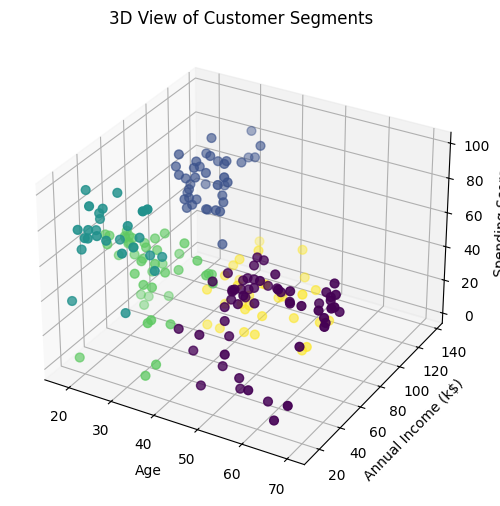

Cluster Profiles:
           Age  Annual_income  Spending_score
Cluster                                      
0        55.28          47.62           41.71
1        32.88          86.10           81.53
2        25.77          26.12           74.85
3        26.73          54.31           40.91
4        44.39          89.77           18.48


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv("data/Mall_Customers.csv")
df.rename(columns={'Annual Income (k$)': 'Annual_income', 
                   'Spending Score (1-100)': 'Spending_score'}, inplace=True)
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})

features = df[['Age', 'Annual_income', 'Spending_score']]
scaler = StandardScaler()
X = scaler.fit_transform(features)

inertia = []
K_range = range(1, 11)
for k in K_range:
    km = KMeans(n_clusters=k, init='k-means++', random_state=42)
    km.fit(X)
    inertia.append(km.inertia_)

plt.figure(figsize=(8,4))
plt.plot(K_range, inertia, 'bx-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()

k_opt = 5
kmeans = KMeans(n_clusters=k_opt, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Annual_income', y='Spending_score', 
                hue='Cluster', palette='viridis', s=60)
plt.title(f'K-Means Clustering (k={k_opt})')
plt.show()

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Age'], df['Annual_income'], df['Spending_score'],
           c=df['Cluster'], cmap='viridis', s=40)
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score')
plt.title('3D View of Customer Segments')
plt.show()

print("Cluster Profiles:")
print(df.groupby('Cluster')[['Age','Annual_income','Spending_score']].mean().round(2))

df.to_csv("clustered_customers.csv", index=False)

cluster_profiles = df.groupby('Cluster')[['Age', 'Annual_income', 'Spending_score']].mean().round(2)
cluster_profiles.to_csv("cluster_profiles_summary.csv")
